# ALGORITHM QUESTIONS

## 1. Top K frequent States

Given an array of plate numbers in which each plate number is combination of State initials (2 letters) and car number (4 digit), return the k most frequent State initials.


*Example*

```
plate_numbers = ['AL2213',
              'PA2233', 
              'MI8811', 
              'PA2101', 
              'TX1231', 
              'NY5121', 
              'PA1123', 
              'LA1200', 
              'TX0231',
              'LA1120', 
              'PA3415', 
              'LA8821']

plate_numbers[0] = 'AL2213'
state_initials= 'AL'
car_num = '2213'


top_3 = ['PA', 'LA', 'TX']

```


In [90]:
from typing import List, Tuple

def top_K(plate_numbers: List[str], k: int) -> List[int]:
    '''
    inputs:an array of car numbers and an integer which is the number of top elements
    output:an array of top - k car initials
    '''
    # Time complexity is O(n)
    # We don't use heap sort
    counts = {}
    frequencies = [[] for i in range(len(plate_numbers) + 1)]


    # we increase the count according to plate numbers
    for i in plate_numbers:
        plate = i[0:2]
        counts[plate] = 1 + counts.get(plate,0)
    for key, value in counts.items():
        frequencies[value].append(key)

    print(counts)
    return_value = []

    for i in range(len(frequencies)):
        last_index = len(frequencies) - i - 1
        last = frequencies[last_index]

        if len(last) != 0 :
            for vv in last:
                return_value.append(vv)
                if len(return_value) == k:
                    return return_value


    return return_value
plate_numbers = ['AL2213',
              'PA2233', 
              'MI8811', 
              'PA2101', 
              'TX1231', 
              'NY5121', 
              'PA1123', 
              'LA1200', 
              'TX0231',
              'LA1120', 
              'PA3415', 
              'LA8821']
top_K(plate_numbers,3)


{'AL': 1, 'PA': 4, 'MI': 1, 'TX': 2, 'NY': 1, 'LA': 3}


['PA', 'LA', 'TX']

## 2. Minimum Number of Crews

In car maintenance center, we need to assign at least **two crews** to each car. As the manager, every morning, you receive a list of tomorrow's orders and your task is to find the minimum number of crews. Each order has a start time and end time, and for simplicity, we convert the start time and end time to timestapms. (ex. order1 = [420, 530])

*Example*

```
tomorrow_orders = [[420, 650],
                  [500, 660],
                  [680, 900],
                  [530, 720],
                  [640, 1200]]

minimum_number_of_crews = 8

```

In [91]:
from typing import List

def minimum_number_of_crews(tomorrow_orders: List[List[int]]) -> int:
    sorted_orders = sorted(tomorrow_orders, key=lambda order: order[0])
    print(sorted_orders)

    min_crews = 0

    # crew_conflicts are just used for debugging
    # crews_conflicts = [0] * len(sorted_orders)
    for i, order in enumerate(sorted_orders):
        start, end = order
        no_of_crews = 0

        for j,another_order in enumerate(sorted_orders):
            another_start, another_end = another_order
            if i != j:
                if (start >= another_start and start <= another_end) or (end >=another_start and end <=another_end) :
                    no_of_crews += 1
                # print(f" {start }   {end} {another_start } {another_end} ")
                # print(f"{another_start >= start} {another_start <= end} {another_end >=start} {another_end <=start}")

        # crews_conflicts[i] = no_of_crews
        if no_of_crews > min_crews:
            min_crews = no_of_crews
    # print(crews_conflicts)
    return min_crews * 2
tomorrow_orders = [[420, 650],
                  [500, 660],
                  [680, 900],
                  [530, 720],
                  [640, 1200]]
minimum_number_of_crews(tomorrow_orders)

[[420, 650], [500, 660], [530, 720], [640, 1200], [680, 900]]


8

## 3. Compare long RFID numbers

We have multiple tag readers that read car numbers (RFIDs) and send them to an FTP server. An RFID consists of 4 letters as car intials and 6 digits as car numbers. The only problem is that each reader may send RFIDs in different formats. 

*Example*

```
RFID = "XOMX" + "221300"


reader1 -> '####XOMX     221300######'
reader2 -> 'XOMX$$$$$$$$$221300$$$$$$'
reader3 -> 'XOMX221300---------------'
reader4 -> 'XOMX221300'
```

Your task is to write an algorithm to compare any two RFIDs in any format. 


In [92]:
def compare_rfids(rfid1, rfid2):
    car_initials1 = next((rfid1[i:i+4] for i in range(len(rfid1) - 3) if rfid1[i:i+4].isalpha()))
    car_numbers1 = next((rfid1[i:i+6] for i in range(len(rfid1) - 5) if rfid1[i:i+6].isdigit()))
    car_initials2 = next((rfid2[i:i+4] for i in range(len(rfid2) - 3) if rfid2[i:i+4].isalpha()))
    car_numbers2 =  next((rfid2[i:i+6] for i in range(len(rfid2) - 5) if rfid2[i:i+6].isdigit()))

    if car_initials1 == car_initials2 and car_numbers1 == car_numbers2:
        return True
    else:
        return False
    
reader1 = "####XOMX     221300######"
reader2 = "XOMX$$$$$$$$$221300$$$$$$"
reader3 = "XOMX221300---------------"
reader4 = "XOMX221300"
reader5 = "XOMX$$$$1$$$$221300$$$$$$"
reader6 = "ass12XOMX$$$$XSD$$$$221300$$$$123$$"

asd = [reader1,reader2,reader3,reader4,reader5,reader6]

for i in asd:
    for j in asd:
       if compare_rfids(i,j):
           print("Correct")

Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct


## 4. Message stream data

**Classes and defult values**

Assume that we have an engine which keeps sending us its status in different messages.\
Every 0 to 5 seconds we may recieve a message. We want to define three different functions to:\

- to print timestamp and messages we recieve
- to print unique messages in a given time interval
- to print those messages that have been sent once in a given time interval

In [93]:
import numpy as np
MAX_N = 20
class Status:
    def __init__(self, message, timestamp):
        self.message = message
        self.timestamp = timestamp
    def __str__(self):
        return "{}\t{}".format(self.timestamp, self.message)
    
class Engine:
    def __init__(self):
        self.i = 0
        self.timer = 0
        self.messages =   [(0, 'confirmation2'),
                 (6, 'confirmation1'),
                 (10, 'error2'),
                 (7, 'confirmation1'),
                 (9, 'confirmation3'),
                 (5, 'confirmation3'),
                 (2, 'confirmation3'),
                 (3, 'error1'),
                 (4, 'confirmation2'),
                 (6, 'test3'),
                 (6, 'error3'),
                 (8, 'test1'),
                 (6, 'test1'),
                 (13, 'test1'),
                 (3, 'confirmation2'),
                 (12, 'confirmation3'),
                 (7, 'test2'),
                 (9, 'confirmation2'),
                 (10, 'error2'),
                 (11, 'test1'),
                 (11, 'error2'),
                 (23, 'confirmation1'),
                 (2, 'test2'),
                 (11, 'error2'),
                 (4, 'error2'),
                 (1, 'error3'),
                 (13, 'test1'),
                 (19, 'error2'),
                 (11, 'confirmation3'),
                 (14, 'error3'),
                 (6, 'test3'),
                 (4, 'test2'),
                 (10, 'error3'),
                 (8, 'test2'),
                 (5, 'confirmation1'),
                 (9, 'test2'),
                 (2, 'error1'),
                 (9, 'confirmation1'),
                 (22, 'error1'),
                 (21, 'confirmation3'),
                 (3, 'error3'),
                 (3, 'confirmation3'),
                 (23, 'test1'),
                 (4, 'confirmation1'),
                 (3, 'test3'),
                 (7, 'test2'),
                 (1, 'confirmation3'),
                 (5, 'error2'),
                 (2, 'test2'),
                 (4, 'error1'),
                 (9, 'confirmation1'),
                 (3, 'test3'),
                 (3, 'test3'),
                 (7, 'test1'),
                 (26, 'error1'),
                 (2, 'error3'),
                 (1, 'confirmation1'),
                 (6, 'confirmation1')]
    def get_status(self):
        if self.i>=len(self.messages):
            self.i = 0
        self.timer += self.messages[self.i][0]
        body = self.messages[self.i][1]
        self.i += 1

        return Status(body, self.timer)


### 4.1: print all messages:

In [94]:
def printAllMessages():
    engine = Engine()
    print("time\tmessage")
    engine.messages.sort(key=lambda x:int(x[0]))
    for i in range(len(engine.messages)):
        '''
        [ADD YOUR CODE HERE]
        '''
        print(f"{engine.messages[i][0]}\t{engine.messages[i][1]}")

printAllMessages()

time	message
0	confirmation2
1	error3
1	confirmation3
1	confirmation1
2	confirmation3
2	test2
2	error1
2	test2
2	error3
3	error1
3	confirmation2
3	error3
3	confirmation3
3	test3
3	test3
3	test3
4	confirmation2
4	error2
4	test2
4	confirmation1
4	error1
5	confirmation3
5	confirmation1
5	error2
6	confirmation1
6	test3
6	error3
6	test1
6	test3
6	confirmation1
7	confirmation1
7	test2
7	test2
7	test1
8	test1
8	test2
9	confirmation3
9	confirmation2
9	test2
9	confirmation1
9	confirmation1
10	error2
10	error2
10	error3
11	test1
11	error2
11	error2
11	confirmation3
12	confirmation3
13	test1
13	test1
14	error3
19	error2
21	confirmation3
22	error1
23	confirmation1
23	test1
26	error1


### 4.2. print one message every 10 seconds

In [95]:
def printUniqueMessages(interval=10):
    engine = Engine()
    print("time\tmessage")
    engine.messages.sort(key=lambda x:int(x[0]))
    my_dict = {}

    for i in range(len(engine.messages)):
        message = engine.messages[i][1]
        ts = engine.messages[i][0]
        if message in my_dict:
            diff = ts - my_dict[message]
            if abs(diff) > 10:
                print(f"{ts}	{message}")
#             else:
#                  print(f"{ts}	{message} REMOVED as {ts} -  {my_dict[message]} <= 10")
        else:
            print(f"{ts}	{message}")
        my_dict[message]=ts
            
print("Running:")
printUniqueMessages(10)


Running:
time	message
0	confirmation2
1	error3
1	confirmation3
1	confirmation1
2	test2
2	error1
3	test3
4	error2
6	test1
22	error1
23	confirmation1


### 4.3. Skip duplicated messages +- 10 seconds

In [96]:
def skipDuplicatedMessages(interval=10):
    '''
    this function takes interval (for example 10 seconds) and print only messages we got once every 10
    10 seconds.

    For example: list of all messages is
    time	message
    0	confirmation2
    6	confirmation1 [keep it 23 - 6 > 10]
    16	error2
    23	confirmation1 [keep it 23 - 6 > 10]
    32	confirmation3 [remove it 37 -32 < 10] duplicated
    37	confirmation3 [remove it 39 - 37 < 10 and 37 -32<10] duplicated
    39	confirmation3 [remove it 39 - 27 < 10 and 45 - 39 <10] duplicated
    45	confirmation3 [remove it 45 - 39 < 10] duplicated



    [ADD YOUR CODE HERE]
    Feel free to edit any lines of this function
    '''
    engine = Engine()
    print("time\tmessage")
    #engine.messages.sort(key=lambda x:int(x[0]))
    # print(engine.messages)
    my_dict = {}

    messages = []
    timestamps = {}
    for (timestamp, message) in engine.messages:
        if message not in timestamps or timestamp - timestamps[message] > 10 or timestamps[message] - timestamp > 10:
            timestamps[message] = timestamp
            messages.append((timestamp, message))
            print(f"{timestamp}\t{message}")
    
        
skipDuplicatedMessages()

time	message
0	confirmation2
6	confirmation1
10	error2
9	confirmation3
3	error1
6	test3
6	error3
8	test1
7	test2
23	confirmation1
5	confirmation1
22	error1
21	confirmation3
3	confirmation3
23	test1
4	error1
7	test1
26	error1


# MYSQL AND DATABASE DESIGN

## CAR TABLE

we have database to store data of all cars in our yard, and it has two main tables:


*   carporfile: which has car informations like car_number, customer, car_type,...

```
CARPROFILE
             car_number     |customer   | car_type
             ---------------|-----------|-----------
             'XOMX001122'   |'ABC'      | Container 
             'GMTX112332'   |'TWW'      | Tanker
             'XOMX001122'   |'PCA'      | Boxcar

```

*   triplist: which has information about trips made by cars like: trip_id, car_number, arrival_date, departure_date,...

```
TRIPLIST
             trip_id        |car_number     |arrival_date        |departure_date
             ---------------|---------------|--------------------|-----------
             1              |'XOMX001122'   |2022-01-01 12:32:23 |2022-12-01 14:02:33 
             2              |'GMTX112332'   |2022-11-01 02:42:03 |2023-01-01 12:32:23
             3              |'XOMX001122'   |2023-03-11 09:22:35 |1900-01-01 00:00:00 (it means the car hasn't left yet)
```

*   movements: which is a table on our database that keeps track of any movements a rail car had in the yard. In this table, each row shows car_number, location, move_in_date, and move_out_date.

```
MOVEMENTS
             id             |trip_id     |location       | move_in_date    | move_out_date
             ---------------|------------|---------------|-----------------|--------------
             1              |1           |'storage'      | 06/01/2022      |07/02/2022
             2              |1           |'in/out'       | 07/01/2022      |07/11/2022
             3              |1           |'storage'      | 05/21/2022      |06/05/2022
```

### 1. CREATE a Database containing the listed tables

```
CREATE TABLE CARPROFILE (
    car_number VARCHAR(10) PRIMARY KEY,
    customer VARCHAR(50),
    car_type VARCHAR(50)
);

CREATE TABLE TRIPLIST (
    trip_id INT PRIMARY KEY,
    car_number VARCHAR(10) REFERENCES CARPROFILE(car_number),
    arrival_date DATETIME,
    departure_date DATETIME
);

CREATE TABLE MOVEMENTS (
    id INT PRIMARY KEY,
    trip_id INT REFERENCES TRIPLIST(trip_id),
    location VARCHAR(50),
    move_in_date DATE,
    move_out_date DATE
);
```

### 2. INSERT some random data into your database tables

'''
[CODE is SQL/MYSQL HERE]
'''
INSERT INTO CARPROFILE VALUES 
('XOMX001122', 'ABC', 'Container'),
('GMTX112332', 'TWW', 'Tanker'),
('XOMX001123', 'PCA', 'Boxcar');

INSERT INTO TRIPLIST VALUES 
(1, 'XOMX001122', '2022-01-01 12:32:23', '2022-12-01 14:02:33'),
(2, 'GMTX112332', '2022-11-01 02:42:03', '2023-01-01 12:32:23'),
(3, 'XOMX001122', '2023-03-11 09:22:35', '1900-01-01 00:00:00');

INSERT INTO MOVEMENTS VALUES 
(1, 1, 'storage', '2022-06-01', '2022-07-02'),
(2, 1, 'in/out', '2022-07-01', '2022-07-11'),
(3, 1, 'storage', '2022-05-21', '2022-06-05');


SQL queries are case insensitive, at least for mysql. And, it seems the question contains duplicate values. I have incremented by 1 to avoid that duplication.

### 3. Summary VIEW:

3.1. CREATE a VIEW to show total number of days each car stayed in different locations. \
3.2. If there are some overlabs or duplicated rows, how do you handle them?

In [ ]:
'''
[CODE is SQL/MYSQL HERE]
'''
CREATE VIEW car_location_summary AS
SELECT 
    cp.car_number,
    m.location,
    SUM(DATEDIFF(m.move_out_date, m.move_in_date)) AS total_days
FROM CARPROFILE cp
INNER JOIN TRIPLIST tl ON cp.car_number = tl.car_number
INNER JOIN MOVEMENTS m ON tl.trip_id = m.trip_id
GROUP BY cp.car_number, m.location;


### 4. Daily snapshot of car trips
write a sql query to get a daily snapshot on car trip history. 

**for example** these are all the movement we've done on a car: 

```
MOVEMENTS
             id             |trip_id     |location       | move_in_date    | move_out_date
             ---------------|------------|---------------|-----------------|--------------
             1              |1           |'storage'      | 06/01/2022      |07/01/2022
             2              |1           |'in/out'       | 07/02/2022      |07/11/2022
             3              |1           |'storage'      | 07/12/2022      |09/05/2022
```
The query should give us the following table:

```
             snapshot_date   |car_number     |location       
             ----------------|---------------|---------------
             06/01/2022      |'XOMX001122'   |'storage'      
             06/02/2022      |'XOMX001122'   |'storage'               
             06/03/2022      |'XOMX001122'   |'storage'
             ...
             07/01/2022      |'XOMX001122'   |'storage'
             07/02/2022      |'XOMX001122'   |'in/out' 
             07/03/2022      |'XOMX001122'   |'in/out'
             ...

In [ ]:
'''
[CODE is SQL/MYSQL HERE]
'''

WITH RECURSIVE dates AS (
  SELECT move_in_date AS date, move_out_date, location, trip_id
  FROM (
    SELECT DISTINCT move_in_date, move_out_date, location, trip_id
    FROM MOVEMENTS
  ) AS ranges
  UNION ALL
  SELECT DATE_ADD(date, INTERVAL 1 DAY), move_out_date, location, trip_id
  FROM dates
  WHERE date < move_out_date
)
SELECT DISTINCT DATE_FORMAT(date, '%Y-%m-%d') AS snapshot_date, location, car_number
FROM dates
INNER JOIN TRIPLIST ON TRIPLIST.trip_id = dates.trip_id
CROSS JOIN (
  SELECT DISTINCT move_in_date, move_out_date, trip_id
  FROM MOVEMENTS
) AS ranges
WHERE date BETWEEN ranges.move_in_date AND ranges.move_out_date
ORDER BY snapshot_date, location, car_number;


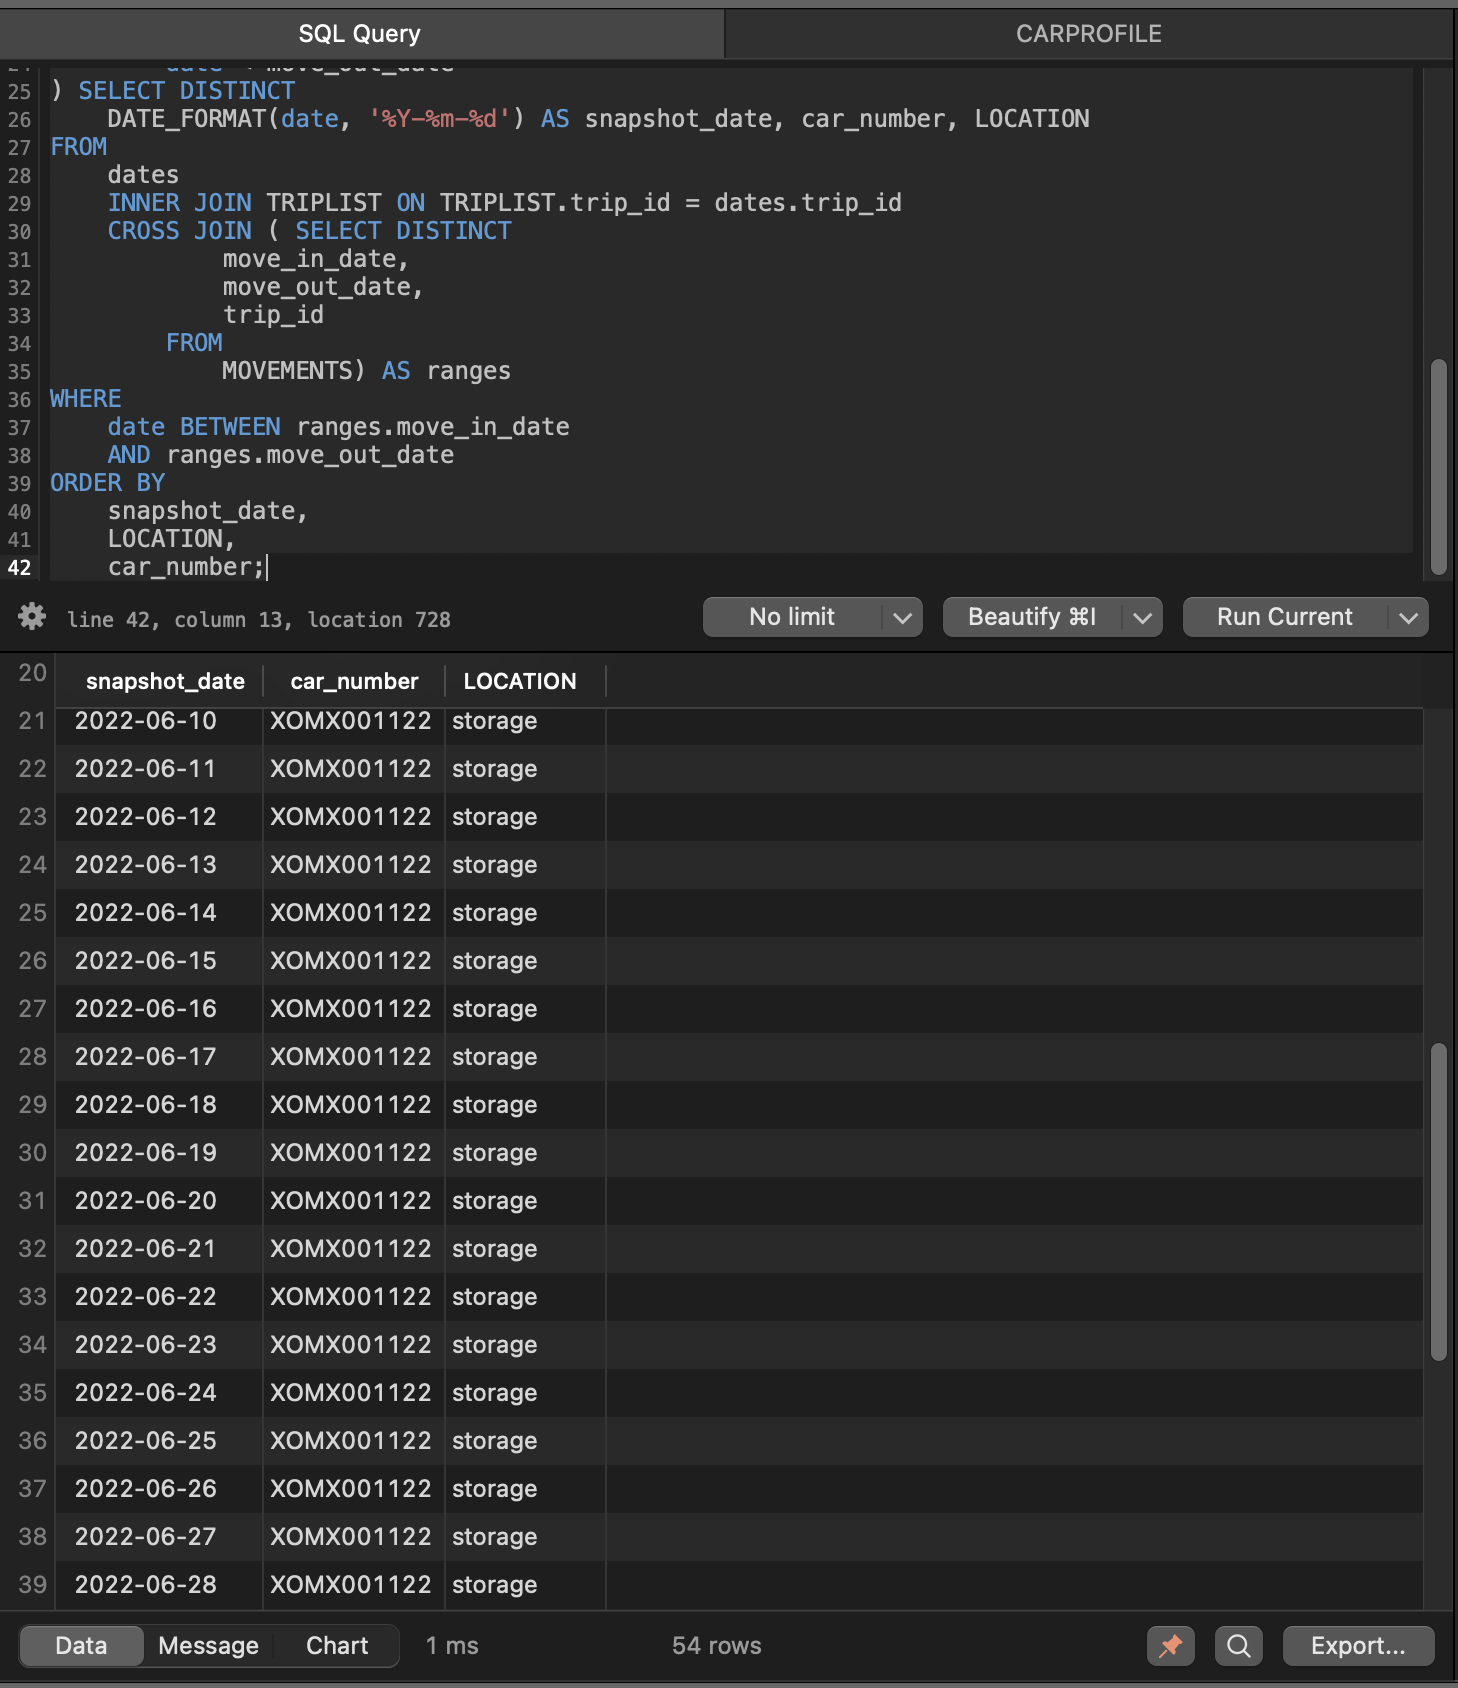